## 1. Data pre-processing

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#select specific columns/survey questions highly associated with cardiovascular disease 
survey_data=pd.read_csv('adult23.csv')

#selected_data = survey_data[['HYPEV_A', 'HYPDIF_A','HYP12M_A', 'HYPMED_A','CHLEV_A','CHL12M_A','CHLMED_A','CHDEV_A','ANGEV_A','MIEV_A','STREV_A']]
selected_data = survey_data[['AGEP_A','SEX_A','HYPEV_A','CHLEV_A','CHDEV_A','ANGEV_A','MIEV_A','STREV_A','PREDIB_A','DIBEV_A','BMICAT_A','ANXEV_A']]
selected_data.isna().sum()


AGEP_A      0
SEX_A       0
HYPEV_A     0
CHLEV_A     0
CHDEV_A     0
ANGEV_A     0
MIEV_A      0
STREV_A     0
PREDIB_A    0
DIBEV_A     0
BMICAT_A    0
ANXEV_A     0
dtype: int64

### 1.1 Data Dictionary
1. HYPEV_A: Have you EVER been told by a doctor or other health professional that you had Hypertension, also called high blood pressure
2. CHLEV_A: Have you EVER been told by a doctor or other health professional that you had high cholesterol? 
3. CHDEV_A: Have you EVER been told by a doctor or other health professional that you had Coronary heart disease?
4. ANGEV_A: Have you EVER been told by a doctor or other health professional that you had Angina, also called angina pectoris? 
5. MIEV_A: Have you EVER been told by a doctor or other health professional that you had A heart attack, also called myocardial infarction? 
6. STREV_A: Have you EVER been told by a doctor or other health professional that you had A stroke? 
7. PREDIB_A: Ever had prediabetes
8. DIBEV_A: Ever had diabetes
9. BMICAT_A: Body Mass Index; height; weight; BMI category; underweight; healthy weight; overweight; obese; obesity

1) Value 1:Underweight 
2) Value 2: Healthy weight 
3) Value 3: Overweight
4) Value 4: Obese

10. ANXEV_A: Ever had anxiety disorder



1. Value 1: YES
2. Value 2: NO
3. Value 7: Refused
4. Value 8: Not Ascertained
5. Value 9: Don't Know


### 1.2 Rename columns for clarity

In [3]:
selected_data = selected_data.rename(
    columns = {'AGEP_A':'Age',
               'SEX_A':'Gender',
               'HYPEV_A':'Hypertension', 
               'CHLEV_A':'high cholesterol', 
               'CHDEV_A': 'Coronary heart disease',
               'ANGEV_A': 'Angina',
               'MIEV_A' : 'heart attack', 
               'STREV_A': 'stroke', 
               'PREDIB_A': 'prediabetes',
               'DIBEV_A': 'diabetes', 
               'BMICAT_A': 'obesity', 
               'ANXEV_A':'stress'})
selected_data

,Age,Gender,Hypertension,high cholesterol,Coronary heart disease,Angina,heart attack,stroke,prediabetes,diabetes,obesity,stress
0,67,1,1,1,2,2,2,1,2,2,3,2
1,73,1,1,2,1,2,1,2,1,1,3,2
2,48,1,2,2,2,2,2,2,2,2,4,2
3,42,2,2,2,2,2,2,2,2,2,3,2
4,50,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
29517,77,2,1,1,2,2,2,2,2,2,4,2
29518,59,2,2,1,2,2,2,2,2,2,3,2
29519,66,1,2,2,2,2,2,2,1,2,4,2
29520,53,2,1,2,2,2,2,2,2,2,3,2


### 1.3 Convert features into binary values (0 and 1). Value 1: Yes, Value 0: No

In [4]:
# drop Value 7: Refused, Value 8: Not Ascertained, Value 9: Don't Know
selected_data= selected_data[~selected_data.isin([7,8,9]).any(axis=1)]


# convert features into binary values (0 and 1). Value 1: Yes, Value 0: NO
#selected_data['obesity'] = selected_data['obesity'].replace({1: 0, 2: 0, 3: 0, 4: 1})
#selected_data = selected_data.replace(2, 0)
selected_data=selected_data[~selected_data.isin([97,98,99]).any(axis=1)]
selected_data

selected_data['obesity'] = selected_data['obesity'].replace({1: 0, 2: 0, 3: 0, 4: 1})
selected_data = selected_data.replace(2, 0)
selected_data['obesity'].unique()

array([0, 1])

Data Dictionary UPDATA

Value 1: YES
Value 2: NO

male 1
female 0

## 2. Explanatory data analysis

### 2.1 Features/Target distribution

In [5]:
features=['Age', 'Gender','Hypertension', 
         'high cholesterol', 
        'Coronary heart disease',
        'Angina',
        'heart attack', 
        'stroke', 
        'prediabetes',
        'diabetes', 
        'obesity', 
        'stress']

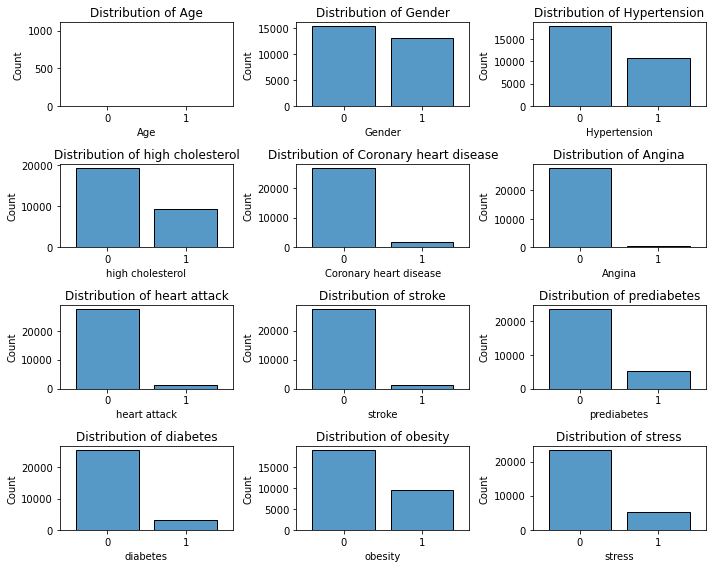

In [6]:
plt.figure(figsize=(10, 8))

for i, col in enumerate(features, 1):
    plt.subplot(4, 3, i)
    plt.title(f"Distribution of {col}")

    sns.histplot(selected_data[col], bins=[-0.4, 0.4, 1.4], discrete=True, shrink=0.8)

    plt.xticks([0, 1])  
    plt.xlim(-0.6, 1.6)  
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

### Based on column heart attack select all '1', and randomly select 2000 '0'

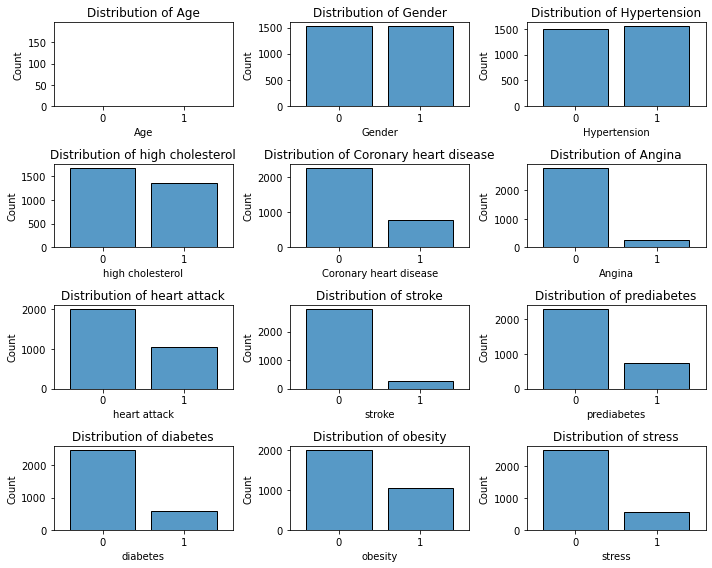

In [7]:
heart_attack_1 = selected_data[selected_data['heart attack'] == 1]

# Step 2: Filter rows where "heart attack" is 0 and randomly select 2000 samples
heart_attack_0 =selected_data[selected_data['heart attack'] == 0].sample(n=2000, random_state=42)

# Step 3: Combine the two datasets
combined_df = pd.concat([heart_attack_1, heart_attack_0])

# If you want to shuffle the combined dataset
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

plt.figure(figsize=(10, 8))

for i, col in enumerate(features, 1):
    plt.subplot(4, 3, i)
    plt.title(f"Distribution of {col}")

    sns.histplot(combined_df[col], bins=[-0.4, 0.4, 1.4], discrete=True, shrink=0.8)

    plt.xticks([0, 1])  
    plt.xlim(-0.6, 1.6)  
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

np_combined_df = combined_df.to_numpy()

### Feature engineering

## 3. Unsupervised model

In [8]:
combined_df.head(10)

,Age,Gender,Hypertension,high cholesterol,Coronary heart disease,Angina,heart attack,stroke,prediabetes,diabetes,obesity,stress
0,42,1,0,1,0,0,0,0,0,0,0,0
1,53,0,0,0,1,1,1,0,1,0,0,1
2,70,0,1,0,0,0,0,0,1,1,1,0
3,36,0,0,0,0,0,0,0,0,0,1,1
4,56,0,1,1,1,0,0,0,0,0,1,0
5,46,1,1,1,1,0,1,0,1,0,1,0
6,45,0,0,1,0,0,0,0,0,0,1,1
7,32,1,0,0,0,0,0,0,0,0,1,0
8,85,1,0,1,0,1,1,1,0,1,0,0
9,65,0,0,1,0,0,0,0,1,0,0,1


### K-Means Clustering

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

X=combined_df
# Perform K-Means Clustering, Add 'Cluster' to the combined_df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# apply PCA
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

n_clusters = 3  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)
combined_df['Cluster'] = clusters


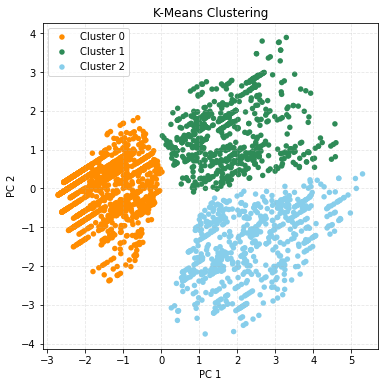

In [10]:
# perform K-Means Clustering
X=combined_df

# standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# apply PCA
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

# perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters
clusters = kmeans.fit_predict(X_pca)
#combined_df['Cluster'] = clusters

plt.figure(figsize=(6, 6))
colors = ['darkorange', 'seagreen', 'skyblue']
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']

for i in range(3):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], 
                color=colors[i], label=labels[i], s=30, edgecolor='none')

plt.title('K-Means Clustering')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(title="")  
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()



### Agglomerative Clustering

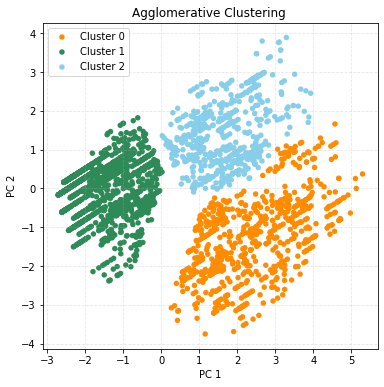

In [11]:
from sklearn.cluster import AgglomerativeClustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# apply PCA
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)  
clusters = agglo.fit_predict(X_pca)


plt.figure(figsize=(6, 6))

colors = ['darkorange', 'seagreen', 'skyblue']
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']

for i in range(3):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], 
                color=colors[i], label=labels[i], s=30, edgecolor='none')

plt.title('Agglomerative Clustering ')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(title="") 
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

### DBSCAN

### 3.1 Elbow Method

In [12]:
!pip install yellowbrick
!pip install --upgrade scikit-learn

In [13]:
pip install --upgrade numpy==1.21.4

Note: you may need to restart the kernel to use updated packages.


In [14]:
# Scikit-learn
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer


In [15]:
import sklearn
print(sklearn.__version__)

1.0.2


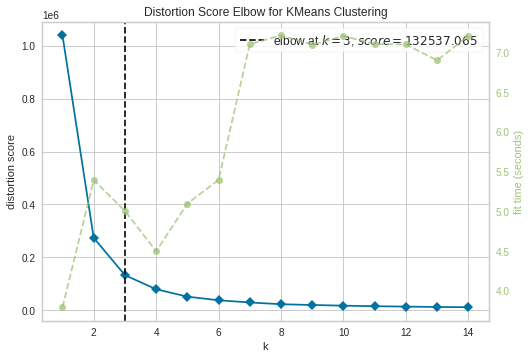

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
RANDOM_STATE=42
model = KMeans(random_state=RANDOM_STATE)
k_elbow = KElbowVisualizer(model, k=(1, 15))
k_elbow.fit(np_combined_df)
k_elbow.show()

### 3.2 Silhouette Score

Silhouette Score: 0.5426


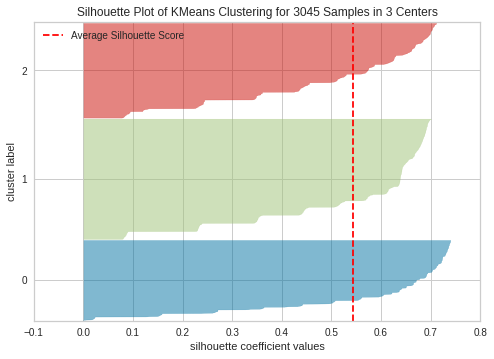

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3045 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [17]:
kmeans_3 = KMeans(n_clusters=3, random_state=RANDOM_STATE) 
silhouette_3 = SilhouetteVisualizer(kmeans_3, colors="yellowbrick")
silhouette_3.fit(combined_df)
score = silhouette_3.silhouette_score_
print(f"Silhouette Score: {score:.4f}")
silhouette_3.show()

Silhouette Score: 0.5118


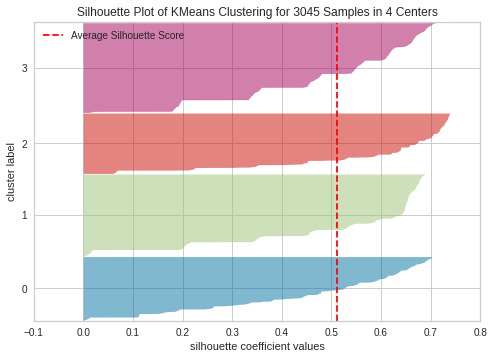

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3045 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [18]:
kmeans_4 = KMeans(n_clusters=4, random_state=RANDOM_STATE) 
silhouette_4 = SilhouetteVisualizer(kmeans_4, colors="yellowbrick")
silhouette_4.fit(combined_df)
score = silhouette_4.silhouette_score_
print(f"Silhouette Score: {score:.4f}")
silhouette_4.show()

Silhouette Score: 0.5057


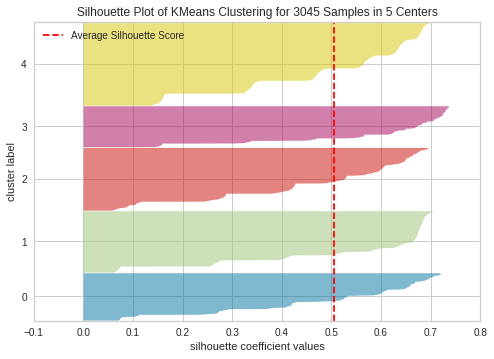

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3045 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [19]:
kmeans_5 = KMeans(n_clusters=5, random_state=RANDOM_STATE) 
silhouette_5 = SilhouetteVisualizer(kmeans_5, colors="yellowbrick")
silhouette_5.fit(combined_df)
score = silhouette_5.silhouette_score_
print(f"Silhouette Score: {score:.4f}")
silhouette_5.show()

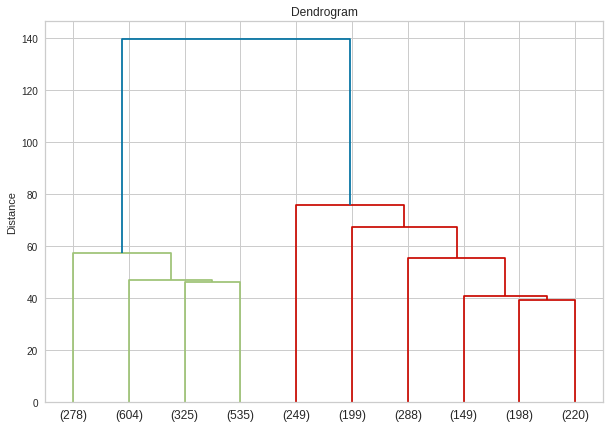

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use the 'linkage' function to compute the linkage matrix
linked = linkage(X_scaled, method='ward')  

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,truncate_mode='lastp',p=10)
#dendrogram(linked, orientation='top', labels=combined_df.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
#plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

### 3.2 Feature importance? 